In [33]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("~/data/test/sunspots/sunspotsM.csv")

In [69]:
yr = df["year"][0]
mo = df["month"][0]
startDt = str(yr)+"-"+str(mo)
del df["year"]
del df["month"]

count = df.shape[0]

dates = pd.date_range(startDt, periods=count, freq='MS')
df["ds"] = dates

df.columns = ["y", "ds"]
df = df[["ds", "y"]]

In [70]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

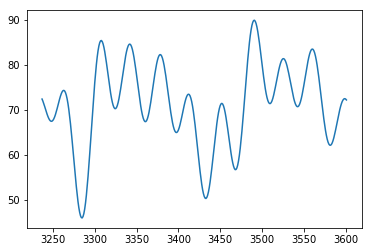

In [73]:
plt.plot(forecast["yhat"][-365:])